42572 - SWANAND WIKRAR

Problem Statement : 
Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a.
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion
matrix.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

a)Perform Data Pre-processing

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [12]:
print("Sample values in training data:")
print(x_train[0])

Sample values in training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  1

In [2]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (for CNN input)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

b)Define Model and perform training

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 0.1460 - accuracy: 0.9541 - val_loss: 0.0408 - val_accuracy: 0.9856
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0378 - val_accuracy: 0.9886
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0308 - val_accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0277 - val_accuracy: 0.9910


c) Evaluate Results using confusion matrix.

313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 976    1    0    0    0    1    0    2    0    0]
 [   0 1133    0    0    1    0    1    0    0    0]
 [   1    3 1019    2    1    0    1    5    0    0]
 [   0    0    2  998    0    5    0    2    1    2]
 [   0    0    0    0  968    0    3    0    1   10]
 [   1    0    0    3    0  884    1    1    1    1]
 [   3    2    0    0    2    1  950    0    0    0]
 [   0    2    2    0    0    0    0 1018    1    5]
 [   1    0    2    1    0    0    1    2  964    3]
 [   0    0    0    0    3    2    0    3    1 1000]]


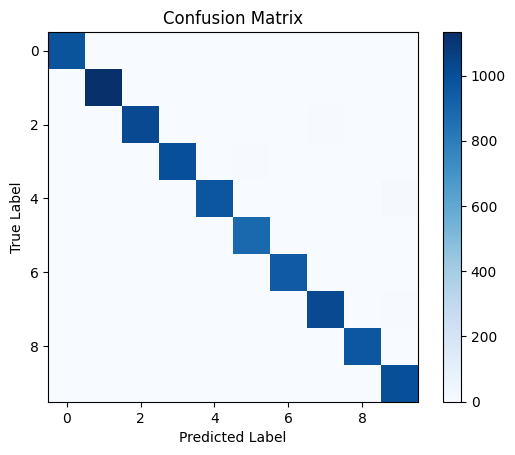

In [4]:
predictions = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Display an example confusion matrix plot
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()